In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from mpl_toolkits.mplot3d import Axes3D 

<IPython.core.display.Javascript object>


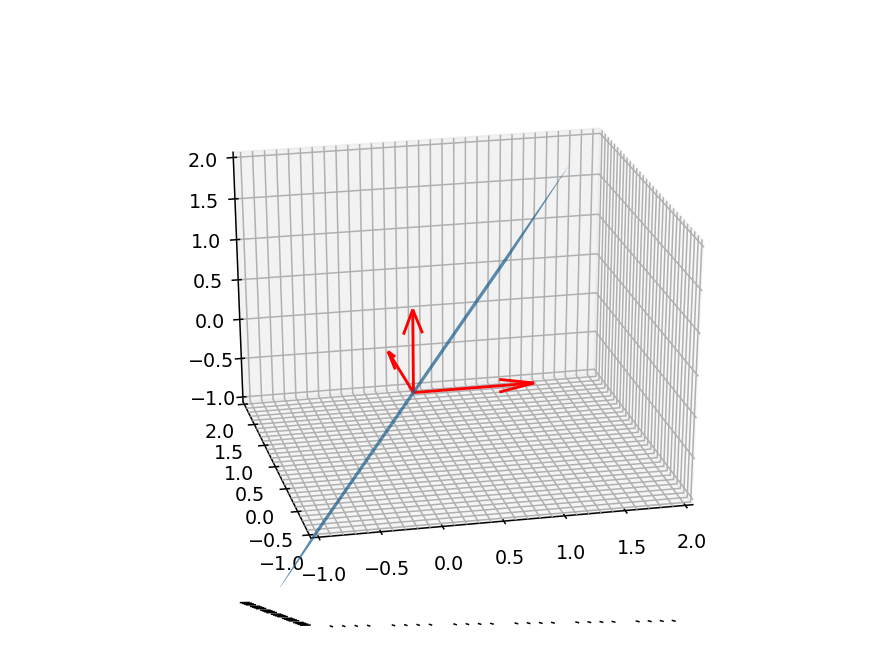

In [40]:
%matplotlib notebook

def vplot2D(ax, v, colours, xlim=[-5,5], ylim=[-5,5]):
    # append two columns of zeros to the left (represents origin)
    vplot = np.vstack((np.zeros((2,v.shape[1])), v))
    ax.quiver(vplot[0,:], vplot[1,:], vplot[2,:], vplot[3,:], angles='xy', scale_units='xy', scale=1, color=colours)
    
    # Set the limits so arrows are not out of view
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Show the major grid lines with dark grey lines
    ax.grid(b=True, which='major', color='#666666', linestyle='-')

    # Show the minor grid lines with very faint and almost transparent grey lines
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax.set_aspect(1)

def vplot3D(ax, v, colours, xlim=[-5,5], ylim=[-5,5], zlim=[-5,5]):
    # append two columns of zeros to the left (represents origin)

    vplot = np.vstack((np.zeros((3,v.shape[1])), v))
    ax.quiver(vplot[0,:], vplot[1,:], vplot[2,:], vplot[3,:], vplot[4,:], vplot[5,:], color=colours)
    
    # Set the limits so arrows are not out of view
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    
    # Show the major grid lines with dark grey lines
    ax.grid(b=True, which='major', color='#666666', linestyle='-')

#   Show the minor grid lines with very faint and almost transparent grey lines
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    
# Testing the plotting function
# Set 2x1 figure    
# fig, ax = plt.subplots(1,2, figsize=(10,10))

# v1 = np.array([[-3, 1, -2],
#                [2, 2, -2]])
# v2 = np.array([[1, 1], 
#                [-1, 1]])
# cols = ['#FF0000', '#00FF00', "#000FFF"]

# vplot2D(ax[0], v1, colours=cols)
# vplot2D(ax[1], v2, colours=cols)

# Testing 3D plotting function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cols = ['#FF0000']

v1 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])

vplot3D(ax, v1, xlim=[-1,2], ylim=[-1,2], zlim=[-1,2], colours=cols)

# plot the surface
x_pln = np.linspace(-1,1,10)
y_pln = np.linspace(-1,1,10)

X_pln,Y_pln = np.meshgrid(x_pln,y_pln)
Z_pln=2*X_pln - Y_pln

# fig = plt.figure()
# ax = fig.gca(projection='3d')

surf = ax.plot_surface(X_pln, Y_pln, Z_pln)

#### Inner Products
An inner product is a function that takes vectors $u$ and $v$ to produce a number $\langle u,v \rangle$ such that the following properties hold: 

1. $ \langle u,v \rangle$ (commutative)
2. $ \langle u+v,w \rangle = \langle u+w,v+w \rangle$ (distributive)
3. $ k\langle u,v \rangle =  \langle ku,v \rangle$ (scalar multiplication)
4. $ \langle u,u \rangle \ge 0$ and $\langle u,u \rangle = 0$ iff $u=0 $ (Positive & Definite)

An example of an inner product is the Euclidean inner product in $R^n$ is  $\langle u,v \rangle = u_{1}v_{1} + ... + u_{n}v_{n}$

Inner products help us define the notions of length in vector spaces other than $R^n$. For example, the $L^2$ norm for $u$ in vector space $V$ is $\lVert u \rVert_{2} = \lVert \sqrt{\langle u,u \rangle} \rVert$

#### Orthogonality

If $\langle u,v \rangle = 0$, we can consider $u$ and $v$ as $\textbf{orthogonal}$. Intuitively, you can think of this as a projection of one vector onto another to yield the zero vector, or in even simpler terms, you can think of both as perpendicular.

$\textbf{Orthonormal}$ vectors are such that their $L^2$ norm equals the unit vector (i.e. $\lVert u \rVert_{2} = 1$) This is useful when we want to scale vectors down to a common length.

$\textbf{Basis vectors}$ are by definition orthonormal vectors that span the entire space through linear combinations. For example, $u_{1} = [1,0]$ and $u_2=[0,1]$ span $R^{2}$. This means that is it possible to reach any point in this space by scaling and adding each basis. 

Let $W$ be subspace of vector space $V$. Vector $u$ in $V$ is orthogonal to $W$ if $u$ is orthogonal to every vector in $W$. Additionally, the set of all vectors in $V$ that are orthogonal to $W$ are the $\textbf{orthogonal complement}$ denoted by $W^{\perp}$.

$\textbf{Orthogonal Projection Theorem}$: If $W$ is a subspace of vector space $V$. then vector $u$ in $V$ can be expressed as $u = w_{1} + w_{2}$ where $w_{1}$ is in $W$ and $w_{2}$ is in $W^{\perp}$.

If $v$ is orthonormal basis for subspace $W$, and $u$ is any vector in $V$: $$proj_{W}u = \langle u_{1},v_{1} \rangle v_1 + ... + \langle u_{n},v_{n} \rangle v_n$$ 

But if $v$ is just orthogonal, then we need to do the above and normalize v: $$proj_{W}u = 
\frac{\langle u,v_{1}\rangle}{\lVert v_{1} \rVert^{2}}v_{1} + ... + 
\frac{\langle u,v_{n}\rangle}{\lVert v_{n} \rVert^{2}}v_{n}$$

In [63]:
# In this case vector space V is R^3
# Let our subspace W be the x-y plane defined by the orthonormal basis v = [v1, v2] = [(1,0,0), (0,1,0)]
v = np.array([[1, 0], 
              [0, 1], 
              [0, 0]])

# We choose u defined by u = [(1, 2, 3)]
u = np.array([[0.5],[1],[1.5]])

# Because v is already orthonormal, we can just take the dot product to get a 3x2 matrix 
# that represents two 3 dimensional vectors that equal to the projection of u onto the x-y plane 
proj_u_on_w = v.T@u

<IPython.core.display.Javascript object>


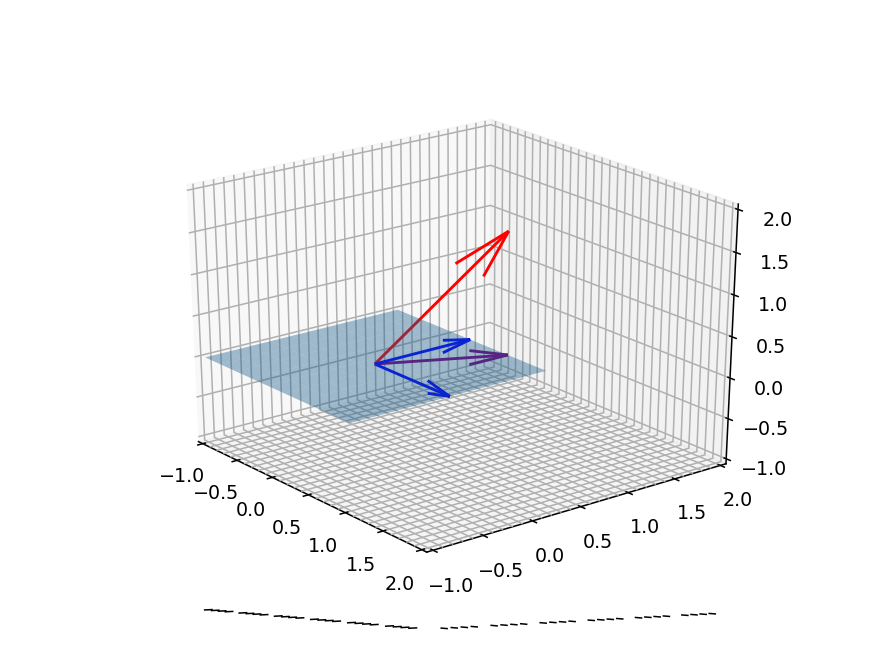

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cols = ["#FF0000", '#0000FF', "#800080"]

vplot3D(ax, u, xlim=[-1,2], ylim=[-1,2], zlim=[-1,2], colours=cols[0])
vplot3D(ax, v, xlim=[-1,2], ylim=[-1,2], zlim=[-1,2], colours=cols[1])

# For the purpose of plotting, add a zero to z value of the projection
vplot3D(ax, np.vstack((proj_u_on_w, 0)), xlim=[-1,2], ylim=[-1,2], zlim=[-1,2], colours=cols[2])

# plot the x-y surface
x_range = np.linspace(-1,1,10)
y_range = np.linspace(-1,1,10)

X_pln,Y_pln = np.meshgrid(x_range,y_range)
Z_pln = np.zeros((1,10))

surf = ax.plot_surface(X_pln, Y_pln, Z_pln, alpha=0.4)